## Homework 1: Submission
### Name: Ximena Calderon Arevalo
#### Date: Feb 10, 2021

In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = '../../../AS_171_205_2021/AS_171_205_2021-Course/data/'
files = [f for f in os.listdir(path) if f.endswith(".csv")]
files

['covid-19-us.csv', 'covid-19-us-states.csv', 'covid-19-us-counties.csv']

In [3]:
df =pd.read_csv(path+files[0])
df

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
379,2021-02-03,26595540,450689
380,2021-02-04,26722382,455805
381,2021-02-05,26851974,459425
382,2021-02-06,26957001,462037


In [4]:
x= df['date']
y= df['cases']
y2 = df['deaths']


<Figure size 432x288 with 0 Axes>

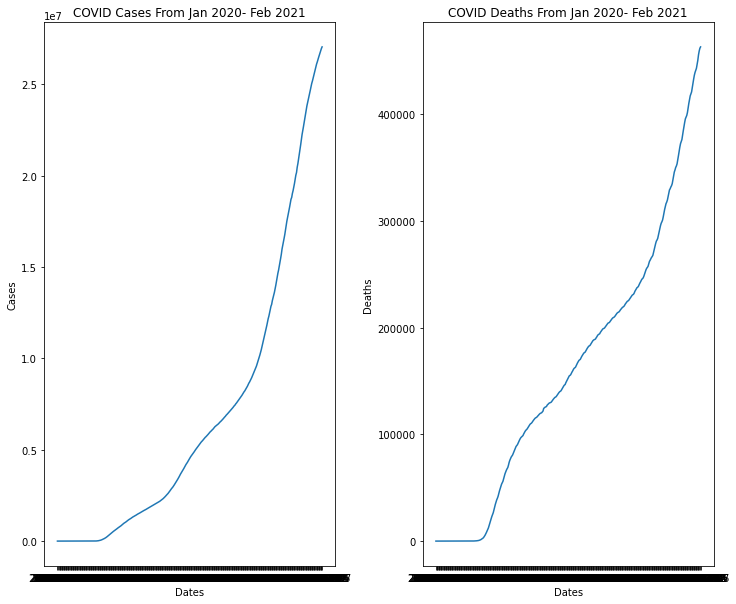

In [5]:
plt.figure()
fig, ax = plt.subplots(1,2, figsize=(12,10))
ax[0].plot(x, y);
ax[1].plot(x, y2);
ax[0].set_title("COVID Cases From Jan 2020- Feb 2021");
ax[1].set_title("COVID Deaths From Jan 2020- Feb 2021");
ax[0].set_xlabel('Dates')
ax[1].set_xlabel('Dates')
ax[0].set_ylabel('Cases');
ax[1].set_ylabel('Deaths');
plt.subplots_adjust(wspace = 0.3);

In [6]:
def take_log(x):
    if x>0:
        return np.log(x)
    else:
        return 0
    

In [7]:
df['log_cases'] = df.cases.apply(take_log)
df['log_deaths'] = df.deaths.apply(take_log)

In [8]:
df

,date,cases,deaths,log_cases,log_deaths
0,2020-01-21,1,0,0.000000,0.000000
1,2020-01-22,1,0,0.000000,0.000000
2,2020-01-23,1,0,0.000000,0.000000
3,2020-01-24,2,0,0.693147,0.000000
4,2020-01-25,3,0,1.098612,0.000000
...,...,...,...,...,...
379,2021-02-03,26595540,450689,17.096254,13.018533
380,2021-02-04,26722382,455805,17.101012,13.029820
381,2021-02-05,26851974,459425,17.105850,13.037731
382,2021-02-06,26957001,462037,17.109754,13.043400


In [9]:
ylog1 = df['log_cases']
ylog2 = df['log_deaths']

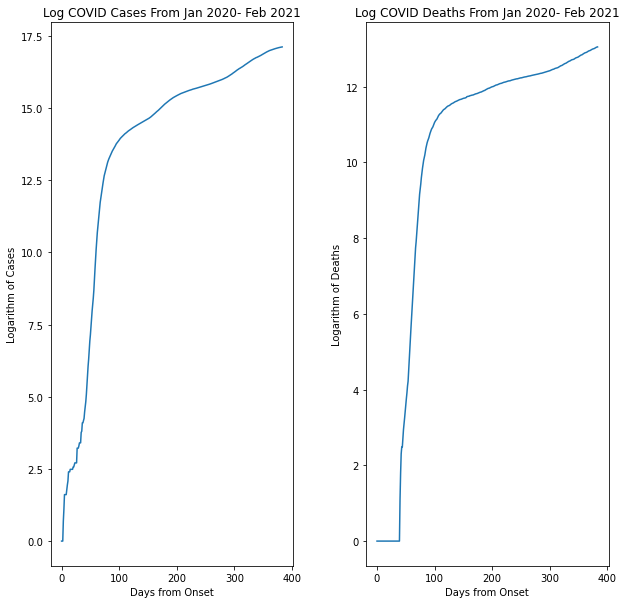

In [10]:
fig2, ax2 = plt.subplots(1,2, figsize=(10,10))
ax2[0].plot(df.index.values, ylog1);
ax2[1].plot(df.index.values, ylog2);
ax2[0].set_title("Log COVID Cases From Jan 2020- Feb 2021");
ax2[1].set_title("Log COVID Deaths From Jan 2020- Feb 2021");
ax2[0].set_xlabel('Days from Onset')
ax2[1].set_xlabel('Days from Onset')
ax2[0].set_ylabel('Logarithm of Cases');
ax2[1].set_ylabel('Logarithm of Deaths');
plt.subplots_adjust(wspace = 0.3);
#ax2[0].set_yscale('log')
#ax2[1].set_yscale('log')

Looks like the left subplot is linear from (0,0) to (10,2). After altering the points a few times I found that it was better to use (2,0) (5,2)

(0.0, 50.0, 0.0, 3.0)

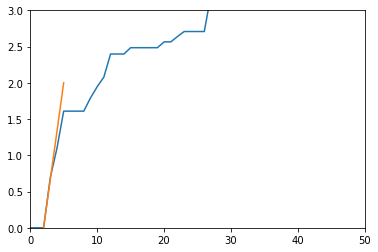

In [11]:
new = plt.plot(df.index.values, ylog1);
pointx = np.array([2,5])
pointy = np.array( [0,2])

m,b = np.polyfit(pointx,pointy,1)
plt.plot(pointx, m*pointx+b)
plt.axis([0, 50, 0, 3])

From the fit, it seems as though there are 3 days (between 2-5) in which the cases doubled.